In [13]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import concat
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from xgboost import plot_importance, plot_tree
from datetime import datetime
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error as MSE

In [14]:
df = pd.read_csv("1등_쓰레기봉투.csv", encoding='cp949')
df['납품요구접수일자'] =  pd.to_datetime(df['납품요구접수일자'])
df = df.set_index('납품요구접수일자')

df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek

# 학습과 테스트 데이터 분리
split_ratio = 0.8
split = int(len(df)*split_ratio)
df_train = df[:split]
df_test = df[split:]

df_train_y = df_train.loc[:,'증감납품요구수량']
df_train_x = df_train.drop('증감납품요구수량', axis=1)
df_test_y = df_test.loc[:,'증감납품요구수량']
df_test_x = df_test.drop('증감납품요구수량', axis=1)

# 나중에 예측값과 비교하기 위해 test 데이터 복제본 저장
df_test_orig = df_test.loc[:, ['증감납품요구수량']]

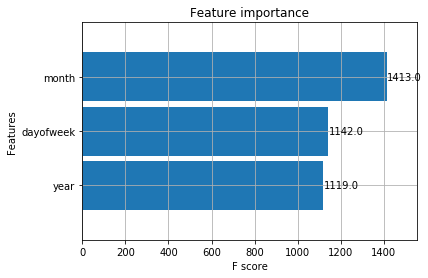

In [76]:
XG_model_month = xgb.XGBRegressor(n_estimators=1000)
XG_model_month.fit(df_train_x, df_train_y, eval_set=[(df_test_x, df_test_y)], early_stopping_rounds=50,verbose=False)
# 주요하게 적용하는 변수를 판단
plot_importance(XG_model_month, height=0.9)

In [16]:
#예측 모델 생성
xgboost = XG_model_month.predict(df_test_x)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from c

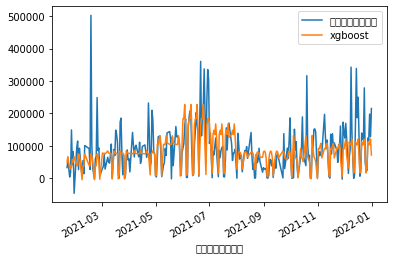

In [78]:
# 실제 값과 예측 값을 하나의 DataFrame으로 만들고 visualize
xgboost_df = pd.DataFrame(xgboost, columns=['xgboost'])
result = pd.concat([df_test_orig.reset_index(), xgboost_df], axis=1, ignore_index=False)
result = result.set_index('납품요구접수일자')
result = result.loc[:, ['증감납품요구수량', 'xgboost']]
result.plot()

In [18]:
# rmse(root mean square error)
rmse = np.sqrt(MSE(df_test_y, xgboost))
print("RMSE : % f" %(rmse))

RMSE :  4860615.832128


In [19]:
df = pd.read_csv("2등_경유.csv", encoding='cp949')
df['납품요구접수일자'] =  pd.to_datetime(df['납품요구접수일자'])
df = df.set_index('납품요구접수일자')

df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek

# 학습과 테스트 데이터 분리
split_ratio = 0.8
split = int(len(df)*split_ratio)
df_train = df[:split]
df_test = df[split:]

df_train_y = df_train.loc[:,'증감납품요구수량']
df_train_x = df_train.drop('증감납품요구수량', axis=1)
df_test_y = df_test.loc[:,'증감납품요구수량']
df_test_x = df_test.drop('증감납품요구수량', axis=1)

# 나중에 예측값과 비교하기 위해 test 데이터 복제본 저장
df_test_orig = df_test.loc[:, ['증감납품요구수량']]

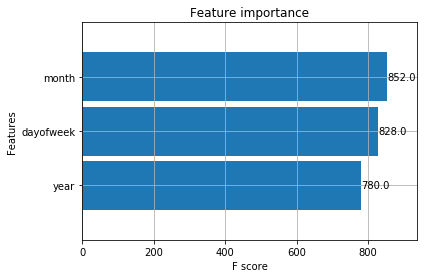

In [20]:
XG_model_month = xgb.XGBRegressor(n_estimators=1000)
XG_model_month.fit(df_train_x, df_train_y, eval_set=[(df_test_x, df_test_y)], early_stopping_rounds=50,verbose=False)

# 주요하게 적용하는 변수를 판단
plot_importance(XG_model_month, height=0.9)

In [21]:
xgboost = XG_model_month.predict(df_test_x)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from c

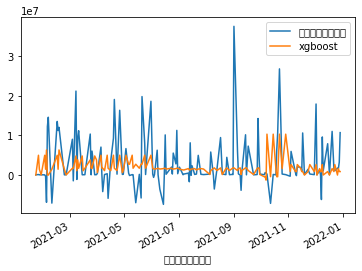

In [22]:
# 실제 값과 예측 값을 하나의 DataFrame으로 만들고 visualize
xgboost_df = pd.DataFrame(xgboost, columns=['xgboost'])
result = pd.concat([df_test_orig.reset_index(), xgboost_df], axis=1, ignore_index=False)
result = result.set_index('납품요구접수일자')
result = result.loc[:, ['증감납품요구수량', 'xgboost']]
result.plot()

In [23]:
 #rmse(root mean square error)
rmse = np.sqrt(MSE(df_test_y, xgboost))
print("RMSE : % f" %(rmse))

RMSE :  6530616.160618


In [24]:
df = pd.read_csv("3등_보건용마스크(공적판매용).csv", encoding='cp949')
df['납품요구접수일자'] =  pd.to_datetime(df['납품요구접수일자'])
df = df.set_index('납품요구접수일자')

df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek

# 학습과 테스트 데이터 분리
split_ratio = 0.8
split = int(len(df)*split_ratio)
df_train = df[:split]
df_test = df[split:]

df_train_y = df_train.loc[:,'증감납품요구수량']
df_train_x = df_train.drop('증감납품요구수량', axis=1)
df_test_y = df_test.loc[:,'증감납품요구수량']
df_test_x = df_test.drop('증감납품요구수량', axis=1)

# 나중에 예측값과 비교하기 위해 test 데이터 복제본 저장
df_test_orig = df_test.loc[:, ['증감납품요구수량']]

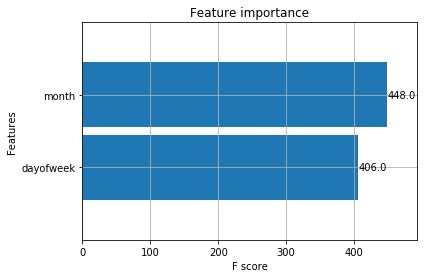

In [25]:
XG_model_month = xgb.XGBRegressor(n_estimators=1000)
XG_model_month.fit(df_train_x, df_train_y, eval_set=[(df_test_x, df_test_y)], early_stopping_rounds=50,verbose=False)

# 주요하게 적용하는 변수를 판단
plot_importance(XG_model_month, height=0.9)

In [26]:
xgboost = XG_model_month.predict(df_test_x)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from c

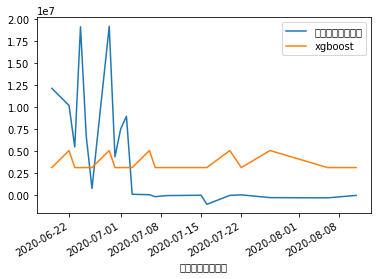

In [27]:
# 실제 값과 예측 값을 하나의 DataFrame으로 만들고 visualize
xgboost_df = pd.DataFrame(xgboost, columns=['xgboost'])
result = pd.concat([df_test_orig.reset_index(), xgboost_df], axis=1, ignore_index=False)
result = result.set_index('납품요구접수일자')
result = result.loc[:, ['증감납품요구수량', 'xgboost']]
result.plot()

In [28]:
# rmse(root mean square error)
rmse = np.sqrt(MSE(df_test_y, xgboost))
print("RMSE : % f" %(rmse))

RMSE :  6215790.593117


In [29]:
df = pd.read_csv("4등_콘크리트벽돌.csv", encoding='cp949')
df['납품요구접수일자'] =  pd.to_datetime(df['납품요구접수일자'])
df = df.set_index('납품요구접수일자')

df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek

# 학습과 테스트 데이터 분리
split_ratio = 0.8
split = int(len(df)*split_ratio)
df_train = df[:split]
df_test = df[split:]

df_train_y = df_train.loc[:,'증감납품요구수량']
df_train_x = df_train.drop('증감납품요구수량', axis=1)
df_test_y = df_test.loc[:,'증감납품요구수량']
df_test_x = df_test.drop('증감납품요구수량', axis=1)

# 나중에 예측값과 비교하기 위해 test 데이터 복제본 저장
df_test_orig = df_test.loc[:, ['증감납품요구수량']]

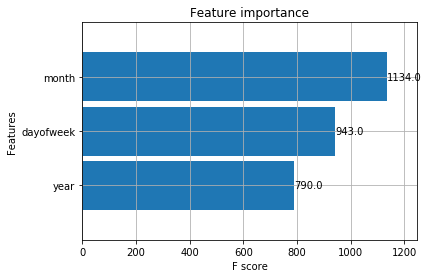

In [30]:
XG_model_month = xgb.XGBRegressor(n_estimators=1000)
XG_model_month.fit(df_train_x, df_train_y, eval_set=[(df_test_x, df_test_y)], early_stopping_rounds=50,verbose=False)

# 주요하게 적용하는 변수를 판단
plot_importance(XG_model_month, height=0.9)

In [31]:
xgboost = XG_model_month.predict(df_test_x)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from c

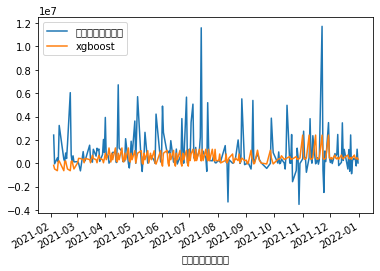

In [32]:
# 실제 값과 예측 값을 하나의 DataFrame으로 만들고 visualize
xgboost_df = pd.DataFrame(xgboost, columns=['xgboost'])
result = pd.concat([df_test_orig.reset_index(), xgboost_df], axis=1, ignore_index=False)
result = result.set_index('납품요구접수일자')
result = result.loc[:, ['증감납품요구수량', 'xgboost']]
result.plot()

In [33]:
# rmse(root mean square error)
rmse = np.sqrt(MSE(df_test_y, xgboost))
print("RMSE : % f" %(rmse))

RMSE :  1876486.559024


In [34]:
df = pd.read_csv("5등_라벨용지.csv", encoding='cp949')
df['납품요구접수일자'] =  pd.to_datetime(df['납품요구접수일자'])
df = df.set_index('납품요구접수일자')

df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek

# 학습과 테스트 데이터 분리
split_ratio = 0.8
split = int(len(df)*split_ratio)
df_train = df[:split]
df_test = df[split:]

df_train_y = df_train.loc[:,'증감납품요구수량']
df_train_x = df_train.drop('증감납품요구수량', axis=1)
df_test_y = df_test.loc[:,'증감납품요구수량']
df_test_x = df_test.drop('증감납품요구수량', axis=1)

# 나중에 예측값과 비교하기 위해 test 데이터 복제본 저장
df_test_orig = df_test.loc[:, ['증감납품요구수량']]

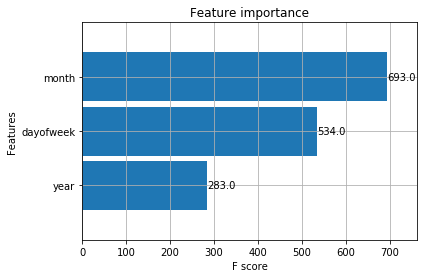

In [35]:
XG_model_month = xgb.XGBRegressor(n_estimators=1000)
XG_model_month.fit(df_train_x, df_train_y, eval_set=[(df_test_x, df_test_y)], early_stopping_rounds=50,verbose=False)

# 주요하게 적용하는 변수를 판단
plot_importance(XG_model_month, height=0.9)

In [36]:
xgboost = XG_model_month.predict(df_test_x)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from c

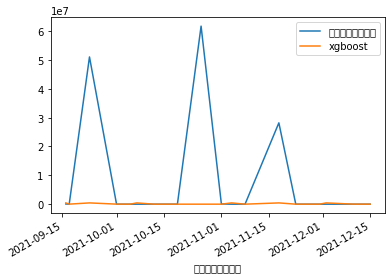

In [37]:
# 실제 값과 예측 값을 하나의 DataFrame으로 만들고 visualize
xgboost_df = pd.DataFrame(xgboost, columns=['xgboost'])
result = pd.concat([df_test_orig.reset_index(), xgboost_df], axis=1, ignore_index=False)
result = result.set_index('납품요구접수일자')
result = result.loc[:, ['증감납품요구수량', 'xgboost']]
result.plot()

In [38]:
# rmse(root mean square error)
rmse = np.sqrt(MSE(df_test_y, xgboost))
print("RMSE : % f" %(rmse))

RMSE :  19901200.598946


In [39]:
df = pd.read_csv("6등_보건용마스크.csv", encoding='cp949')
df['납품요구접수일자'] =  pd.to_datetime(df['납품요구접수일자'])
df = df.set_index('납품요구접수일자')

df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek

# 학습과 테스트 데이터 분리
split_ratio = 0.8
split = int(len(df)*split_ratio)
df_train = df[:split]
df_test = df[split:]

df_train_y = df_train.loc[:,'증감납품요구수량']
df_train_x = df_train.drop('증감납품요구수량', axis=1)
df_test_y = df_test.loc[:,'증감납품요구수량']
df_test_x = df_test.drop('증감납품요구수량', axis=1)

# 나중에 예측값과 비교하기 위해 test 데이터 복제본 저장
df_test_orig = df_test.loc[:, ['증감납품요구수량']]

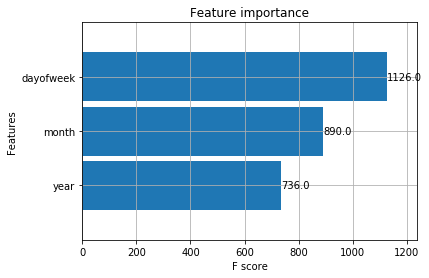

In [40]:
XG_model_month = xgb.XGBRegressor(n_estimators=1000)
XG_model_month.fit(df_train_x, df_train_y, eval_set=[(df_test_x, df_test_y)], early_stopping_rounds=50,verbose=False)

# 주요하게 적용하는 변수를 판단
plot_importance(XG_model_month, height=0.9)

In [41]:
xgboost = XG_model_month.predict(df_test_x)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from c

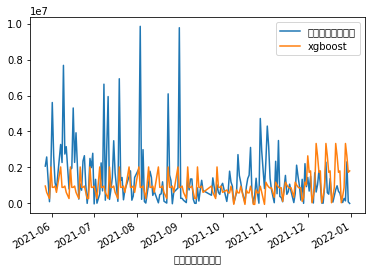

In [42]:
# 실제 값과 예측 값을 하나의 DataFrame으로 만들고 visualize
xgboost_df = pd.DataFrame(xgboost, columns=['xgboost'])
result = pd.concat([df_test_orig.reset_index(), xgboost_df], axis=1, ignore_index=False)
result = result.set_index('납품요구접수일자')
result = result.loc[:, ['증감납품요구수량', 'xgboost']]
result.plot()

In [43]:
# rmse(root mean square error)
rmse = np.sqrt(MSE(df_test_y, xgboost))
print("RMSE : % f" %(rmse))

RMSE :  1733536.355228


In [44]:
df = pd.read_csv("7등_미장벽돌.csv", encoding='cp949')
df['납품요구접수일자'] =  pd.to_datetime(df['납품요구접수일자'])
df = df.set_index('납품요구접수일자')

df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek

# 학습과 테스트 데이터 분리
split_ratio = 0.8
split = int(len(df)*split_ratio)
df_train = df[:split]
df_test = df[split:]

df_train_y = df_train.loc[:,'증감납품요구수량']
df_train_x = df_train.drop('증감납품요구수량', axis=1)
df_test_y = df_test.loc[:,'증감납품요구수량']
df_test_x = df_test.drop('증감납품요구수량', axis=1)

# 나중에 예측값과 비교하기 위해 test 데이터 복제본 저장
df_test_orig = df_test.loc[:, ['증감납품요구수량']]

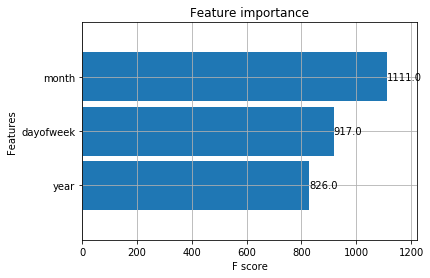

In [45]:
XG_model_month = xgb.XGBRegressor(n_estimators=1000)
XG_model_month.fit(df_train_x, df_train_y, eval_set=[(df_test_x, df_test_y)], early_stopping_rounds=50,verbose=False)

# 주요하게 적용하는 변수를 판단
plot_importance(XG_model_month, height=0.9)

In [46]:
xgboost = XG_model_month.predict(df_test_x)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from c

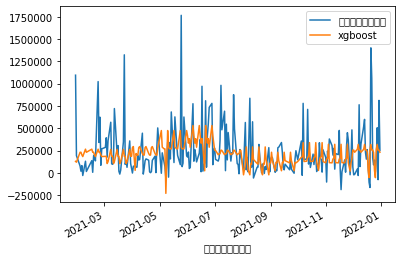

In [47]:
# 실제 값과 예측 값을 하나의 DataFrame으로 만들고 visualize
xgboost_df = pd.DataFrame(xgboost, columns=['xgboost'])
result = pd.concat([df_test_orig.reset_index(), xgboost_df], axis=1, ignore_index=False)
result = result.set_index('납품요구접수일자')
result = result.loc[:, ['증감납품요구수량', 'xgboost']]
result.plot()

In [48]:
# rmse(root mean square error)
rmse = np.sqrt(MSE(df_test_y, xgboost))
print("RMSE : % f" %(rmse))

RMSE :  274707.806382


In [49]:
df = pd.read_csv("8등_기타화초.csv", encoding='cp949')
df['납품요구접수일자'] =  pd.to_datetime(df['납품요구접수일자'])
df = df.set_index('납품요구접수일자')

df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek

# 학습과 테스트 데이터 분리
split_ratio = 0.8
split = int(len(df)*split_ratio)
df_train = df[:split]
df_test = df[split:]

df_train_y = df_train.loc[:,'증감납품요구수량']
df_train_x = df_train.drop('증감납품요구수량', axis=1)
df_test_y = df_test.loc[:,'증감납품요구수량']
df_test_x = df_test.drop('증감납품요구수량', axis=1)

# 나중에 예측값과 비교하기 위해 test 데이터 복제본 저장
df_test_orig = df_test.loc[:, ['증감납품요구수량']]

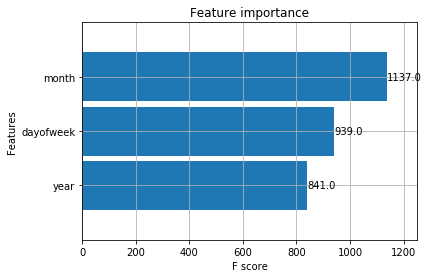

In [50]:
XG_model_month = xgb.XGBRegressor(n_estimators=1000)
XG_model_month.fit(df_train_x, df_train_y, eval_set=[(df_test_x, df_test_y)], early_stopping_rounds=50,verbose=False)

# 주요하게 적용하는 변수를 판단
plot_importance(XG_model_month, height=0.9)

In [51]:
xgboost = XG_model_month.predict(df_test_x)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from c

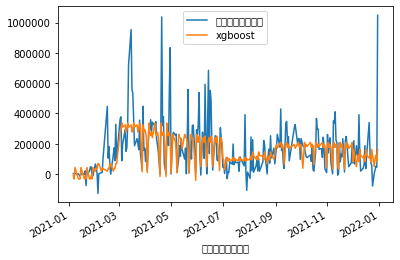

In [52]:
# 실제 값과 예측 값을 하나의 DataFrame으로 만들고 visualize
xgboost_df = pd.DataFrame(xgboost, columns=['xgboost'])
result = pd.concat([df_test_orig.reset_index(), xgboost_df], axis=1, ignore_index=False)
result = result.set_index('납품요구접수일자')
result = result.loc[:, ['증감납품요구수량', 'xgboost']]
result.plot()

In [53]:
# rmse(root mean square error)
rmse = np.sqrt(MSE(df_test_y, xgboost))
print("RMSE : % f" %(rmse))

RMSE :  143774.926542


In [54]:
df = pd.read_csv("9등_강관파일.csv", encoding='cp949')
df['납품요구접수일자'] =  pd.to_datetime(df['납품요구접수일자'])
df = df.set_index('납품요구접수일자')

df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek

# 학습과 테스트 데이터 분리
split_ratio = 0.8
split = int(len(df)*split_ratio)
df_train = df[:split]
df_test = df[split:]

df_train_y = df_train.loc[:,'증감납품요구수량']
df_train_x = df_train.drop('증감납품요구수량', axis=1)
df_test_y = df_test.loc[:,'증감납품요구수량']
df_test_x = df_test.drop('증감납품요구수량', axis=1)

# 나중에 예측값과 비교하기 위해 test 데이터 복제본 저장
df_test_orig = df_test.loc[:, ['증감납품요구수량']]

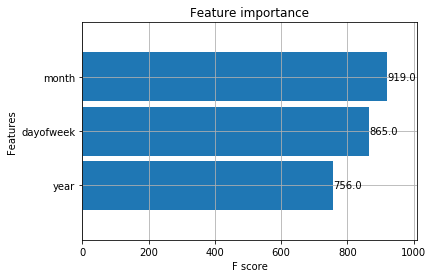

In [55]:
XG_model_month = xgb.XGBRegressor(n_estimators=1000)
XG_model_month.fit(df_train_x, df_train_y, eval_set=[(df_test_x, df_test_y)], early_stopping_rounds=50,verbose=False)

# 주요하게 적용하는 변수를 판단
plot_importance(XG_model_month, height=0.9)

In [56]:
xgboost = XG_model_month.predict(df_test_x)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from c

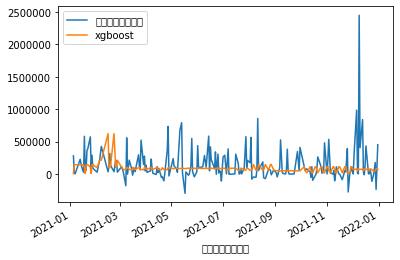

In [57]:
# 실제 값과 예측 값을 하나의 DataFrame으로 만들고 visualize
xgboost_df = pd.DataFrame(xgboost, columns=['xgboost'])
result = pd.concat([df_test_orig.reset_index(), xgboost_df], axis=1, ignore_index=False)
result = result.set_index('납품요구접수일자')
result = result.loc[:, ['증감납품요구수량', 'xgboost']]
result.plot()

In [58]:
# rmse(root mean square error)
rmse = np.sqrt(MSE(df_test_y, xgboost))
print("RMSE : % f" %(rmse))

RMSE :  279132.763536


In [59]:
df = pd.read_csv("10등_음식물쓰레기처리통.csv", encoding='cp949')
df['납품요구접수일자'] =  pd.to_datetime(df['납품요구접수일자'])
df = df.set_index('납품요구접수일자')

df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek

# 학습과 테스트 데이터 분리
split_ratio = 0.8
split = int(len(df)*split_ratio)
df_train = df[:split]
df_test = df[split:]

df_train_y = df_train.loc[:,'증감납품요구수량']
df_train_x = df_train.drop('증감납품요구수량', axis=1)
df_test_y = df_test.loc[:,'증감납품요구수량']
df_test_x = df_test.drop('증감납품요구수량', axis=1)

# 나중에 예측값과 비교하기 위해 test 데이터 복제본 저장
df_test_orig = df_test.loc[:, ['증감납품요구수량']]

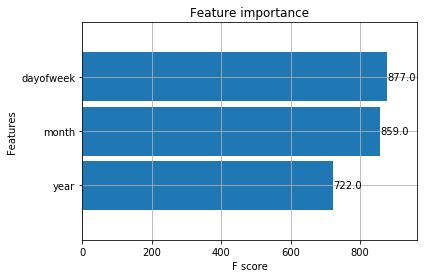

In [60]:
XG_model_month = xgb.XGBRegressor(n_estimators=1000)
XG_model_month.fit(df_train_x, df_train_y, eval_set=[(df_test_x, df_test_y)], early_stopping_rounds=50,verbose=False)

# 주요하게 적용하는 변수를 판단
plot_importance(XG_model_month, height=0.9)

In [61]:
xgboost = XG_model_month.predict(df_test_x)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from c

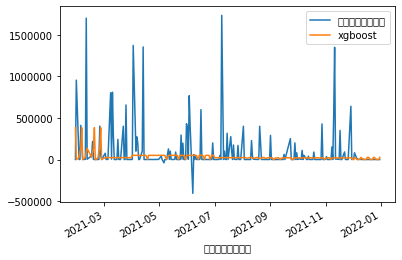

In [62]:
# 실제 값과 예측 값을 하나의 DataFrame으로 만들고 visualize
xgboost_df = pd.DataFrame(xgboost, columns=['xgboost'])
result = pd.concat([df_test_orig.reset_index(), xgboost_df], axis=1, ignore_index=False)
result = result.set_index('납품요구접수일자')
result = result.loc[:, ['증감납품요구수량', 'xgboost']]
result.plot()

In [63]:
# rmse(root mean square error)
rmse = np.sqrt(MSE(df_test_y, xgboost))
print("RMSE : % f" %(rmse))

RMSE :  264498.774742


In [64]:
df = pd.read_csv("11등_레미콘.csv", encoding='cp949')
df['납품요구접수일자'] =  pd.to_datetime(df['납품요구접수일자'])
df = df.set_index('납품요구접수일자')

df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek

# 학습과 테스트 데이터 분리
split_ratio = 0.8
split = int(len(df)*split_ratio)
df_train = df[:split]
df_test = df[split:]

df_train_y = df_train.loc[:,'증감납품요구수량']
df_train_x = df_train.drop('증감납품요구수량', axis=1)
df_test_y = df_test.loc[:,'증감납품요구수량']
df_test_x = df_test.drop('증감납품요구수량', axis=1)

# 나중에 예측값과 비교하기 위해 test 데이터 복제본 저장
df_test_orig = df_test.loc[:, ['증감납품요구수량']]

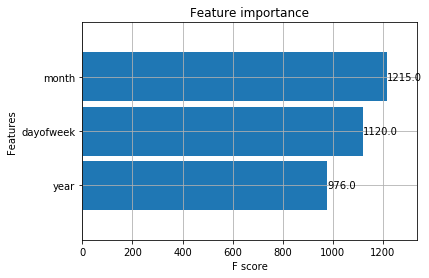

In [65]:
XG_model_month = xgb.XGBRegressor(n_estimators=1000)
XG_model_month.fit(df_train_x, df_train_y, eval_set=[(df_test_x, df_test_y)], early_stopping_rounds=50,verbose=False)

# 주요하게 적용하는 변수를 판단
plot_importance(XG_model_month, height=0.9)

In [66]:
xgboost = XG_model_month.predict(df_test_x)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from c

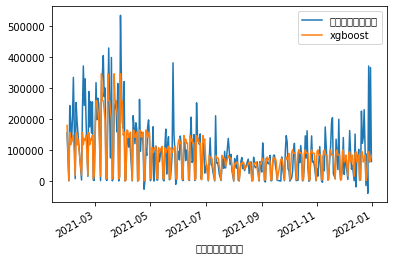

In [67]:
# 실제 값과 예측 값을 하나의 DataFrame으로 만들고 visualize
xgboost_df = pd.DataFrame(xgboost, columns=['xgboost'])
result = pd.concat([df_test_orig.reset_index(), xgboost_df], axis=1, ignore_index=False)
result = result.set_index('납품요구접수일자')
result = result.loc[:, ['증감납품요구수량', 'xgboost']]
result.plot()

In [68]:
# rmse(root mean square error)
rmse = np.sqrt(MSE(df_test_y, xgboost))
print("RMSE : % f" %(rmse))

RMSE :  62020.653420


In [69]:
df = pd.read_csv("12등_금속제창.csv", encoding='cp949')
df['납품요구접수일자'] =  pd.to_datetime(df['납품요구접수일자'])
df = df.set_index('납품요구접수일자')

df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek

# 학습과 테스트 데이터 분리
split_ratio = 0.8
split = int(len(df)*split_ratio)
df_train = df[:split]
df_test = df[split:]

df_train_y = df_train.loc[:,'증감납품요구수량']
df_train_x = df_train.drop('증감납품요구수량', axis=1)
df_test_y = df_test.loc[:,'증감납품요구수량']
df_test_x = df_test.drop('증감납품요구수량', axis=1)

# 나중에 예측값과 비교하기 위해 test 데이터 복제본 저장
df_test_orig = df_test.loc[:, ['증감납품요구수량']]

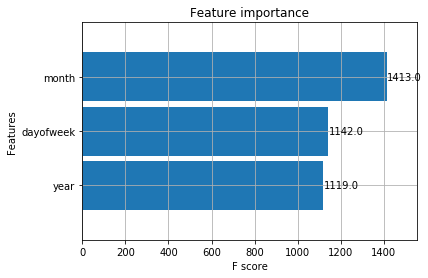

In [70]:
XG_model_month = xgb.XGBRegressor(n_estimators=1000)
XG_model_month.fit(df_train_x, df_train_y, eval_set=[(df_test_x, df_test_y)], early_stopping_rounds=50,verbose=False)

# 주요하게 적용하는 변수를 판단
plot_importance(XG_model_month, height=0.9)

In [71]:
xgboost = XG_model_month.predict(df_test_x)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from c

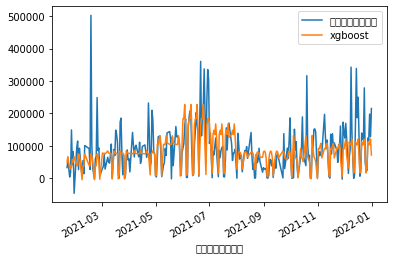

In [72]:
# 실제 값과 예측 값을 하나의 DataFrame으로 만들고 visualize
xgboost_df = pd.DataFrame(xgboost, columns=['xgboost'])
result = pd.concat([df_test_orig.reset_index(), xgboost_df], axis=1, ignore_index=False)
result = result.set_index('납품요구접수일자')
result = result.loc[:, ['증감납품요구수량', 'xgboost']]
result.plot()

In [73]:
# rmse(root mean square error)
rmse = np.sqrt(MSE(df_test_y, xgboost))
print("RMSE : % f" %(rmse))

RMSE :  61551.407416
